# Bank churn prediction

In [2]:
import pandas as pd
bank_df = pd.read_csv("Churn_Modelling.csv")

In [3]:
bank_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
bank_df.drop(columns=['RowNumber', "CustomerId", "Surname"], inplace=True)

In [5]:
bank_df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
bank_df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [7]:
bank_df.Gender.replace({'Female': 1, 'Male': 0}, inplace=True)

C:\Users\domin\AppData\Local\Temp\ipykernel_11116\2841390740.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bank_df.Gender.replace({'Female': 1, 'Male': 0}, inplace=True)
C:\Users\domin\AppData\Local\Temp\ipykernel_11116\2841390740.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bank_df.Gen

In [8]:
bank_df.Gender.unique()

array([1, 0], dtype=int64)

In [9]:
bank_df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [10]:
bank_df = pd.get_dummies(data=bank_df, columns=['Geography']).astype(int)

In [11]:
bank_df.dtypes

CreditScore          int32
Gender               int32
Age                  int32
Tenure               int32
Balance              int32
NumOfProducts        int32
HasCrCard            int32
IsActiveMember       int32
EstimatedSalary      int32
Exited               int32
Geography_France     int32
Geography_Germany    int32
Geography_Spain      int32
dtype: object

In [12]:
# Dividing dataset
X = bank_df.drop(columns=['Exited'])
y = bank_df['Exited']

In [13]:
X.shape

(10000, 12)

In [14]:
X.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [29]:
# SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X, y = smote.fit_resample(X, y)

In [30]:
X.shape

(15926, 12)

In [33]:
y.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [34]:
# data normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[:] = scaler.fit_transform(X)


In [35]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506733,1,0,0
1,0.516,1,0.310811,0.1,0.334028,0.000000,0,1,0.562708,0,0,1
2,0.304,1,0.324324,0.8,0.636354,0.666667,1,0,0.569654,1,0,0
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,1,0,0
4,1.000,1,0.337838,0.2,0.500243,0.000000,1,1,0.395403,0,0,1


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
X_train.shape, X_test.shape

((12740, 12), (3186, 12))

In [38]:
# BUILDING THE MODEL
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(15, input_shape= (12,), activation= 'relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
    ])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [39]:
model.fit(X_train, y_train, epochs=100, batch_size=50)

Epoch 1/100
255/255 [==============================] - 0s 865us/step - loss: 0.6793 - accuracy: 0.5764
Epoch 2/100
255/255 [==============================] - 0s 839us/step - loss: 0.6137 - accuracy: 0.6707
Epoch 3/100
255/255 [==============================] - 0s 773us/step - loss: 0.5634 - accuracy: 0.7150
Epoch 4/100
255/255 [==============================] - 0s 780us/step - loss: 0.5274 - accuracy: 0.7462
Epoch 5/100
255/255 [==============================] - 0s 764us/step - loss: 0.4994 - accuracy: 0.7616
Epoch 6/100
255/255 [==============================] - 0s 772us/step - loss: 0.4823 - accuracy: 0.7695
Epoch 7/100
255/255 [==============================] - 0s 780us/step - loss: 0.4749 - accuracy: 0.7704
Epoch 8/100
255/255 [==============================] - 0s 772us/step - loss: 0.4678 - accuracy: 0.7735
Epoch 9/100
255/255 [==============================] - 0s 784us/step - loss: 0.4628 - accuracy: 0.7754
Epoch 10/100
255/255 [==============================] - 0s 761us/step - l

In [43]:
loss, accuracy = model.evaluate(X_test, y_test)

100/100 [==============================] - 0s 657us/step - loss: 0.4188 - accuracy: 0.7957


In [44]:
pred = model.predict(X_test)
binary_pred = (pred > 0.5).astype(int)
binary_pred[10:15]

100/100 [==============================] - 0s 576us/step


array([[1],
       [1],
       [1],
       [1],
       [0]])

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, binary_pred))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79      1633
           1       0.77      0.83      0.80      1553

    accuracy                           0.80      3186
   macro avg       0.80      0.80      0.80      3186
weighted avg       0.80      0.80      0.80      3186



In [47]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, binary_pred, normalize='true')

<Axes: >

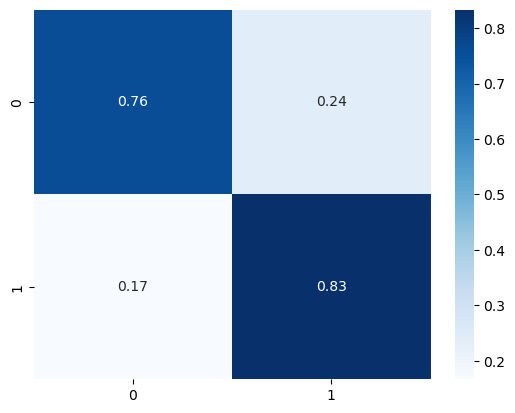

In [48]:
import seaborn as sns
sns.heatmap(cf, cmap='Blues', annot=True)